In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install -q transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.0/7.0 MB 53.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 82.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.2/224.2 kB 22.5 MB/s eta 0:00:00


In [ ]:
import transformers

##Preprocessing Dataset

In [ ]:
import pandas as pd
import numpy as np

In [ ]:

import torch

import copy
import numpy as np
import pandas as pd
import seaborn as sns
from pylab import rcParams
import matplotlib.pyplot as plt
from matplotlib import rc

from sklearn.model_selection import train_test_split
from tqdm import tqdm

from torch import nn, optim
from torch.utils import data
from torch.utils.data import Dataset, DataLoader

%matplotlib inline
%config InlineBackend.figure_format='retina'

sns.set(style='whitegrid', palette='muted', font_scale=1.2)
HAPPY_COLORS_PALETTE = ["#01BEFE", "#FFDD00", "#FF7D00", "#FF006D", "#ADFF02", "#8F00FF"]
sns.set_palette(sns.color_palette(HAPPY_COLORS_PALETTE))
rcParams['figure.figsize'] = 8, 6
RANDOM_SEED = 42
np.random.seed(RANDOM_SEED)
torch.manual_seed(RANDOM_SEED)

In [ ]:
df = pd.read_csv("/content/final_dataset_appendedEverything.csv")
df.dropna()

,Unnamed: 0.2,Unnamed: 0.1,level_0,index,Unnamed: 0,post,Mach,LSRP12,LSRP2,NRSM,Person,dark_triad,eng_usage_ratio,bng_usage_ratio,eng_switching_ratio,bng_switching_ratio
0,0,0,0,0,0,my heart my soul..T-T,68,1.3,2.5,3,2,"mach, psycho",100.000000,0.000000,0.000000,0.000000
1,1,1,2,2,2,Free speech is a joke in this country,68,1.3,2.5,3,2,"mach, psycho",100.000000,0.000000,0.000000,0.000000
2,2,2,5,5,5,Make 500 sequels I don't care.Make another Jus...,68,1.3,2.5,3,2,"mach, psycho",76.470588,17.647059,66.666667,33.333333
3,3,3,6,6,6,Everybody wants a piece of the politically cor...,68,1.3,2.5,3,2,"mach, psycho",100.000000,0.000000,0.000000,0.000000
4,4,4,10,10,10,And that's how a movement dies.,68,1.3,2.5,3,2,"mach, psycho",83.333333,16.666667,50.000000,50.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8687,8687,8687,12710,12745,12745,TWO SUPERHUMANS IN ONE FRAME <3,53,1.9,3.1,19,100,"psycho, narcisist",71.428571,14.285714,50.000000,50.000000
8688,8688,8688,12711,12746,12746,Man!!!\nThe chase- UNBELIEVABLE!! Mushi and Ri...,53,1.9,3.1,19,100,"psycho, narcisist",33.333333,55.555556,60.000000,40.000000
8689,8689,8689,12713,12748,12748,<3 <3,53,1.9,3.1,19,100,"psycho, narcisist",50.000000,0.000000,0.000000,0.000000
8690,8690,8690,12714,12749,12749,Madrid Triumphs!! :D,53,1.9,3.1,19,100,"psycho, narcisist",50.000000,25.000000,100.000000,0.000000


In [ ]:
mean = df['NRSM'].mean()
mean

15.771514035895075

In [ ]:
def compare(ratings):
    rating = int(ratings)
    if rating > 15:
        return 1
    else:
        return 0

In [ ]:
df['Trait'] = df.NRSM.apply(compare)

In [ ]:
df

,Unnamed: 0.2,Unnamed: 0.1,level_0,index,Unnamed: 0,post,Mach,LSRP12,LSRP2,NRSM,Person,dark_triad,eng_usage_ratio,bng_usage_ratio,eng_switching_ratio,bng_switching_ratio,Trait
0,0,0,0,0,0,my heart my soul..T-T,68,1.3,2.5,3,2,"mach, psycho",100.000000,0.000000,0.000000,0.000000,0
1,1,1,2,2,2,Free speech is a joke in this country,68,1.3,2.5,3,2,"mach, psycho",100.000000,0.000000,0.000000,0.000000,0
2,2,2,5,5,5,Make 500 sequels I don't care.Make another Jus...,68,1.3,2.5,3,2,"mach, psycho",76.470588,17.647059,66.666667,33.333333,0
3,3,3,6,6,6,Everybody wants a piece of the politically cor...,68,1.3,2.5,3,2,"mach, psycho",100.000000,0.000000,0.000000,0.000000,0
4,4,4,10,10,10,And that's how a movement dies.,68,1.3,2.5,3,2,"mach, psycho",83.333333,16.666667,50.000000,50.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8687,8687,8687,12710,12745,12745,TWO SUPERHUMANS IN ONE FRAME <3,53,1.9,3.1,19,100,"psycho, narcisist",71.428571,14.285714,50.000000,50.000000,1
8688,8688,8688,12711,12746,12746,Man!!!\nThe chase- UNBELIEVABLE!! Mushi and Ri...,53,1.9,3.1,19,100,"psycho, narcisist",33.333333,55.555556,60.000000,40.000000,1
8689,8689,8689,12713,12748,12748,<3 <3,53,1.9,3.1,19,100,"psycho, narcisist",50.000000,0.000000,0.000000,0.000000,1
8690,8690,8690,12714,12749,12749,Madrid Triumphs!! :D,53,1.9,3.1,19,100,"psycho, narcisist",50.000000,25.000000,100.000000,0.000000,1


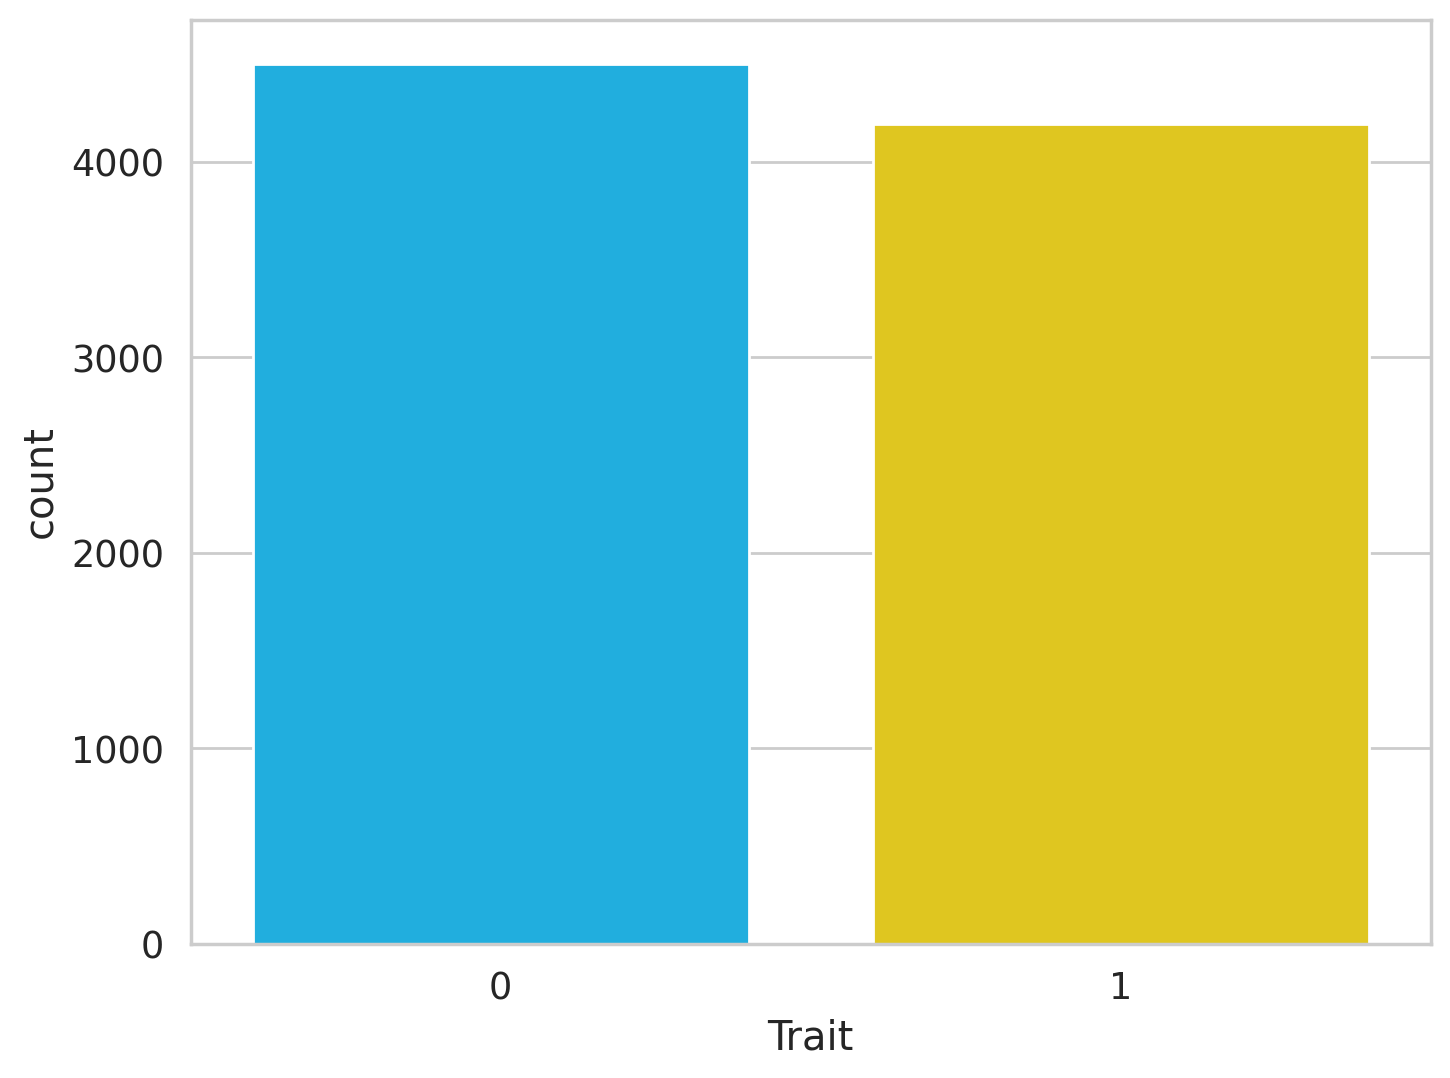

In [ ]:
sns.countplot(data = df, x = 'Trait')
plt.show()

In [ ]:
class_names = ['Not narcissist', 'Narcissist']

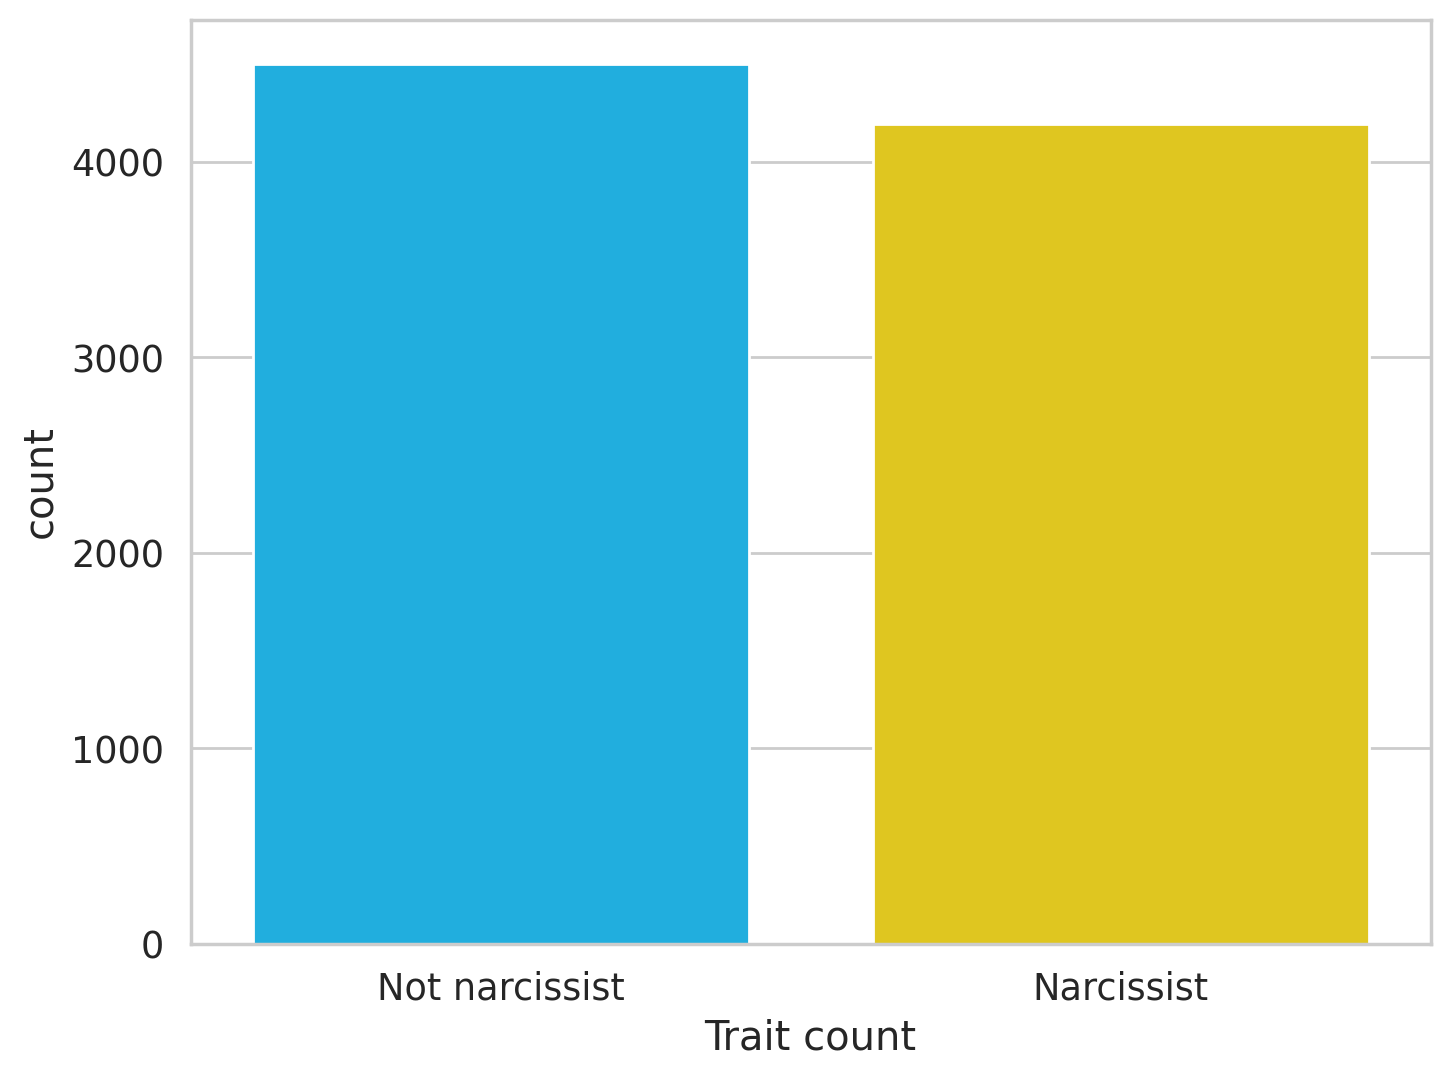

In [ ]:
ax = sns.countplot(data =df, x = 'Trait')
plt.xlabel('Trait count')
ax.set_xticklabels(class_names);

In [ ]:
# we will be using pre-trained tokenizer provided by huggingface

# from transformers import AutoTokenizer, AutoModelForMaskedLM

# tokenizer = AutoTokenizer.from_pretrained("bert-base-multilingual-cased")

from transformers import BertTokenizer, BertModel

tokenizer = BertTokenizer.from_pretrained('bert-base-multilingual-cased')


##Text Preprocessing

In [ ]:
# now I am showing how tokenizer helps creating tokens in a sentence so that bert can understand

simple_text = 'When was I last outside? I am stucked at home for last two weeks. '
tokens = tokenizer.tokenize(simple_text)

In [ ]:
tokens

['When',
 'was',
 'I',
 'last',
 'outside',
 '?',
 'I',
 'am',
 'st',
 '##uck',
 '##ed',
 'at',
 'home',
 'for',
 'last',
 'two',
 'weeks',
 '.']

In [ ]:
# each tokens will have id's and these ids will be fed to bert model as models don't understand text.
token_ids = tokenizer.convert_tokens_to_ids(tokens)

In [ ]:
# printing for better undrstanding

print(f'Sentence : {simple_text}')
print(f'Tokens : {tokens}')
print(f'Token ID : {token_ids}')

Sentence : When was I last outside? I am stucked at home for last two weeks. 
Tokens : ['When', 'was', 'I', 'last', 'outside', '?', 'I', 'am', 'st', '##uck', '##ed', 'at', 'home', 'for', 'last', 'two', 'weeks', '.']
Token ID : [12242, 10134, 146, 12469, 17555, 136, 146, 10392, 28780, 31746, 10336, 10160, 11816, 10142, 12469, 10551, 20750, 119]


In [ ]:
##Special tokens

tokenizer.sep_token, tokenizer.sep_token_id

('[SEP]', 102)

In [ ]:
#classification token : we must add this token to the start of each sentence, so BERT knows we're doing classification
tokenizer.cls_token, tokenizer.cls_token_id

('[CLS]', 101)

In [ ]:
# padding_token
tokenizer.pad_token, tokenizer.pad_token_id

('[PAD]', 0)

In [ ]:
# unknown token : if any word is unknown to the model
tokenizer.unk_token, tokenizer.unk_token_id

('[UNK]', 100)

In [ ]:
# we can use these special token together using encode_plus()

encoding = tokenizer.encode_plus(
    simple_text,
    max_length= 32,
    truncation=True,
    add_special_tokens = True,
    padding='max_length',
    return_attention_mask = True,
    return_token_type_ids = False,
    return_tensors = 'pt'

)

encoding.keys()

dict_keys(['input_ids', 'attention_mask'])

In [ ]:
encoding['input_ids']

# 0s were padded to make the input length 32(max_len)

tensor([[  101, 12242, 10134,   146, 12469, 17555,   136,   146, 10392, 28780,
         31746, 10336, 10160, 11816, 10142, 12469, 10551, 20750,   119,   102,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0]])

In [ ]:
# in case of attention mask, 1 : words are there
#                             0 : 0s are padded

encoding['attention_mask']

tensor([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0]])

##choosing sequence's max_length
BERT works with fixed-length sequences. We'll use a simple strategy to choose the max length. Let's store the token length of each review: 512 is the max length for BERT

In [ ]:
token_lens = []

for txt in df.post:
  tokens = tokenizer.encode(txt, max_length=512)
  token_lens.append(len(tokens))

Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.


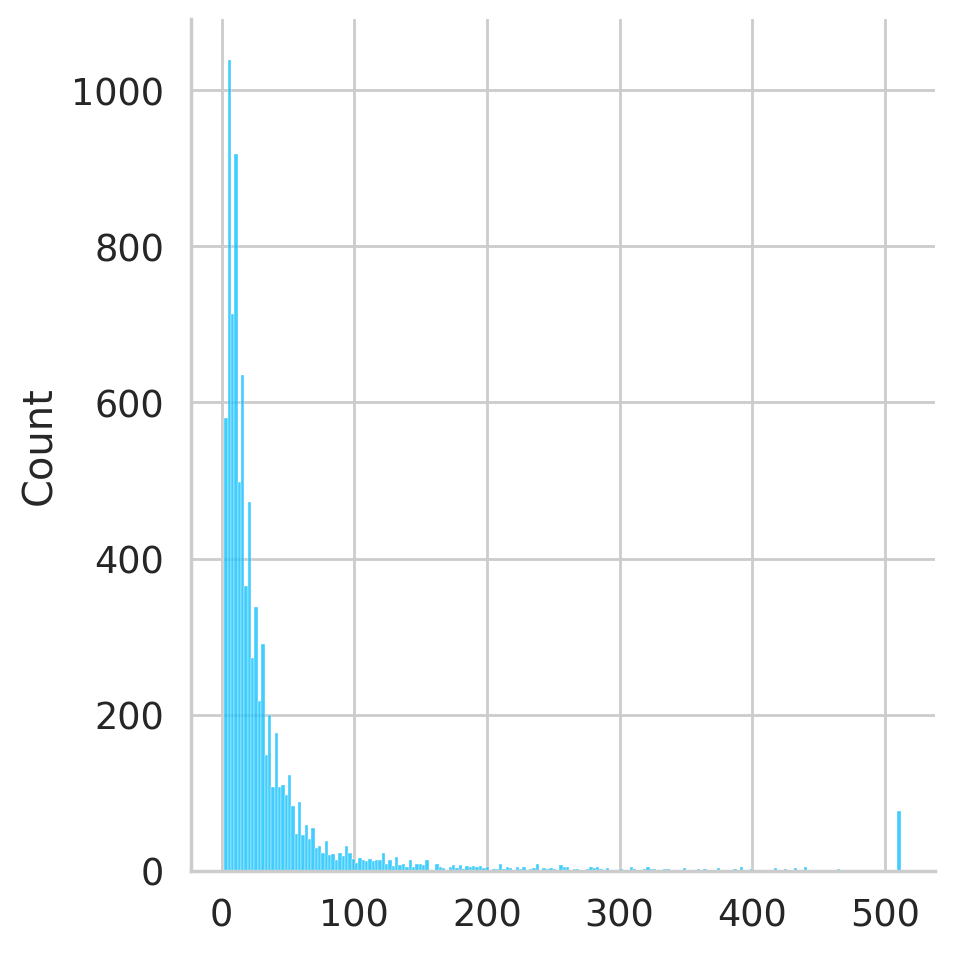

In [ ]:
sns.displot(token_lens)

In [ ]:
class GooglePlayReviewDataset(Dataset):
    def __init__(self, reviews, targets, tokenizer, max_len):
        self.reviews = reviews
        self.targets = targets
        self.tokenizer = tokenizer
        self.max_len = max_len

    def __len__(self):
        return len(self.reviews)
    
    def __getitem__(self, item):
        review = str(self.reviews[item])
        target = self.targets[item]
        encoding = self.tokenizer.encode_plus(
            review,
            max_length= self.max_len,
            truncation=True,
            add_special_tokens = True,
            padding='max_length',
            return_attention_mask = True,
            return_tensors = 'pt'
        )
        return{
            'review_text': review,
            'input_ids': encoding['input_ids'].flatten(),
            'attention_mask': encoding['attention_mask'].flatten(),
            'targets' : torch.tensor(self.targets[item], dtype = torch.long)
        }

In [ ]:
MAX_LEN = 256
Epoch = 10
BATCH_SIZE = 16

##Splitting the dataset

In [ ]:
# splitting the dataset into test,validation and train
df_train, df_test = train_test_split(df, test_size= 0.2, random_state=RANDOM_SEED)
df_val, df_test = train_test_split(df_test, test_size= 0.5, random_state=RANDOM_SEED)

In [ ]:
df_train.shape

(6953, 17)

In [ ]:
df_test.shape, df_val.shape

((870, 17), (869, 17))

In [ ]:
df.keys()

Index(['Unnamed: 0.2', 'Unnamed: 0.1', 'level_0', 'index', 'Unnamed: 0',
       'post', 'Mach', 'LSRP12', 'LSRP2', 'NRSM', 'Person', 'dark_triad',
       'eng_usage_ratio', 'bng_usage_ratio', 'eng_switching_ratio',
       'bng_switching_ratio', 'Trait'],
      dtype='object')

In [ ]:
# create dataLoader

def create_data_loader(df, tokenizer, max_len, batch_size):
  ds = GooglePlayReviewDataset(
    reviews=df.post.to_numpy(),
    targets=df.Trait.to_numpy(),
    tokenizer=tokenizer,
    max_len=max_len 
  )

  return DataLoader(
    ds,
    batch_size=batch_size,
    drop_last = True,
    shuffle = True,
    num_workers=2
  )

In [ ]:
# creating train, test, validation dataLoader

train_data_loader = create_data_loader(df_train, tokenizer, MAX_LEN, BATCH_SIZE)
val_data_loader = create_data_loader(df_val, tokenizer, MAX_LEN, BATCH_SIZE)
test_data_loader = create_data_loader(df_test, tokenizer, MAX_LEN, BATCH_SIZE)


In [ ]:
#Let's have a look at an example batch from our training data loader
dataset = next(iter(train_data_loader))
dataset.keys()

dict_keys(['review_text', 'input_ids', 'attention_mask', 'targets'])

In [ ]:
print(dataset['input_ids'].shape)

torch.Size([16, 256])


In [ ]:
print(dataset['targets'].shape)

torch.Size([16])


##Loading and using MBERT model

In [ ]:
from transformers import BertModel, BertTokenizer, AdamW, get_linear_schedule_with_warmup

In [ ]:
bert_model = BertModel.from_pretrained('bert-base-multilingual-cased')


Some weights of the model checkpoint at bert-base-multilingual-cased were not used when initializing BertModel: ['cls.seq_relationship.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.bias', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.decoder.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.dense.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [ ]:
# bert model uses 768 hidden units
bert_model.config.hidden_size

768

In [ ]:
# now we are calling bert model and this will return the last hidden stage of bert model and polled output

last_hidden_state, polled_output = bert_model(input_ids=encoding['input_ids'], attention_mask = encoding['attention_mask'])

In [ ]:
class SentimentClassifier(nn.Module):

  def __init__(self, n_classes):
    super(SentimentClassifier, self).__init__()
    self.bert = BertModel.from_pretrained('bert-base-multilingual-cased', return_dict=False)
    self.drop = nn.Dropout(p=0.3)
    self.out = nn.Linear(self.bert.config.hidden_size, n_classes)
  
  def forward(self, input_ids, attention_mask):
    _, pooled_output = self.bert(
      input_ids=input_ids,
      attention_mask=attention_mask
    )
    output = self.drop(pooled_output)
    return self.out(output)

In [ ]:
print(len(class_names))

2


In [ ]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = SentimentClassifier(len(class_names))
model = model.to(device)

Some weights of the model checkpoint at bert-base-multilingual-cased were not used when initializing BertModel: ['cls.seq_relationship.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.bias', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.decoder.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.dense.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [ ]:
#now look at the sample data
input_ids = dataset['input_ids'].to(device)
attention_mask = dataset['attention_mask'].to(device)
print(input_ids.shape)
print(attention_mask.shape)

torch.Size([16, 256])
torch.Size([16, 256])


In [ ]:
# now run the model and see how it performs
print(input_ids.dtype)
model(input_ids, attention_mask)

torch.int64


tensor([[-0.2055,  0.3961],
        [-0.3698,  0.0975],
        [-0.1126, -0.0011],
        [-0.0854,  0.1886],
        [-0.1687,  0.1594],
        [-0.3352,  0.5209],
        [-0.0132,  0.2319],
        [-0.0972,  0.5027],
        [-0.2044,  0.1377],
        [-0.0396,  0.0493],
        [-0.2517,  0.2286],
        [-0.2574,  0.1936],
        [-0.2969,  0.2501],
        [ 0.0444,  0.2504],
        [-0.1909,  0.1148],
        [-0.3664,  0.2737]], device='cuda:0', grad_fn=<AddmmBackward0>)

##Now train the model

In [ ]:
optimizer = AdamW(model.parameters(), lr = 2e-5, correct_bias = False, no_deprecation_warning=True)

total_steps = len(train_data_loader)*Epoch

scheduler = get_linear_schedule_with_warmup(
    optimizer,
    num_warmup_steps = 0,
    num_training_steps = total_steps

)

loss_func = nn.CrossEntropyLoss().to(device)

In [ ]:
#train epoch helper method -> iterate over all the train examples

def train_epoch(model, data_loader, loss_func, scheduler, device, optimizer, num_examples):
    #put the model in train mood -> batch normalization, dropout is enabled
    model = model.train()
    losses = []
    correct_predictions = 0

    for d in data_loader:
        input_ids = d['input_ids'].to(device)
        attention_mask = d['attention_mask'].to(device)
        targets = d['targets'].to(device)
        outputs = model(
            input_ids = input_ids,
            attention_mask = attention_mask
        )
        # we will take the max prediction along dim 1
        _, preds = torch.max(outputs, dim = 1)
        loss = loss_func(outputs , targets)

        correct_predictions += torch.sum(preds == targets)
        losses.append(loss.item())

        #backprop

        loss.backward()
        #gradient clipping -> solves exploiding gradient problem
        nn.utils.clip_grad_norm_(model.parameters(), max_norm = 1.0)
        optimizer.step()
        scheduler.step()
        optimizer.zero_grad()

    return correct_predictions.double()/num_examples, np.mean(losses)




In [ ]:
# create a val epoch helper function

def eval_epoch(model, data_loader, loss_func, device, num_examples):
    #put the model in eval mood -> batch normalization, dropout is disabled
    model = model.eval()

    losses = []
    correct_predictions = 0

    #disable the gradient descent so that model can run faster
    with torch.no_grad():
        for d in data_loader:
            input_ids = d['input_ids'].to(device)
            attention_mask = d['attention_mask'].to(device)
            targets = d['targets'].to(device)
            outputs = model(
                input_ids = input_ids,
                attention_mask = attention_mask
            )
            # we will take the max prediction along dim 1
            _, preds = torch.max(outputs, dim = 1)
            loss = loss_func(outputs , targets)

            correct_predictions += torch.sum(preds == targets)
            losses.append(loss.item())

        # no training is required
    return correct_predictions.double()/num_examples, np.mean(losses)
        


In [ ]:
%%time
from collections import defaultdict
from typing import DefaultDict
# see the accuracy, loss


history = defaultdict(list)
best_accuracy = 0

for epoch in range(Epoch):
    print(f'Epoch {epoch + 1}/ {Epoch}')
    print('-'*15)

    train_accuracy, train_loss = train_epoch(model, train_data_loader, loss_func, scheduler, device, optimizer, len(df_train))
    print(f'Train loss {train_loss} train accuracy {train_accuracy}')

    val_acc, val_loss = eval_epoch(model, val_data_loader, loss_func, device, len(df_val))
    print(f'validation loss {val_loss} validation accuracy {val_acc}')
    print()


    history['train_accuracy'].append(train_accuracy)
    history['train_loss'].append(train_loss)

    history['val_accuracy'].append(val_acc)
    history['val_loss'].append(val_loss)

    if val_acc > best_accuracy:
      torch.save(model.state_dict(), '/content/drive/My Drive/best_model_state.bin')
      best_accuracy = val_acc


   

Epoch 1/ 10
---------------
Train loss 0.7044779221583072 train accuracy 0.5233712066733784
validation loss 0.6865293162840383 validation accuracy 0.5535097813578826

Epoch 2/ 10
---------------
Train loss 0.6957412625787445 train accuracy 0.5238026751042716
validation loss 0.6883548586456864 validation accuracy 0.5523590333716916

Epoch 3/ 10
---------------
Train loss 0.6927451198826188 train accuracy 0.5317129296706458
validation loss 0.6869144572152032 validation accuracy 0.5535097813578826

Epoch 4/ 10
---------------
Train loss 0.6919433245186433 train accuracy 0.543650222925356
validation loss 0.6864743762546115 validation accuracy 0.5546605293440736

Epoch 5/ 10
---------------
Train loss 0.6890782952858007 train accuracy 0.54465698259744
validation loss 0.6860222739202005 validation accuracy 0.5431530494821634

Epoch 6/ 10
---------------
Train loss 0.6822649229506743 train accuracy 0.5716956709334101
validation loss 0.6729207259637339 validation accuracy 0.5765247410817032

E

In [ ]:
##Download the model

!gdown --id 1ySeW8VTjRJEANWLo53DuJCjuWYi0KvNc

/usr/local/lib/python3.9/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1ySeW8VTjRJEANWLo53DuJCjuWYi0KvNc
To: /content/best_model_state.bin
100% 712M/712M [00:15<00:00, 45.2MB/s]


In [ ]:
model = SentimentClassifier(len(class_names))
model.load_state_dict(torch.load('best_model_state.bin'))
model = model.to(device)

Some weights of the model checkpoint at bert-base-multilingual-cased were not used when initializing BertModel: ['cls.seq_relationship.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.bias', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.decoder.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.dense.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


##Evaluate model

In [ ]:
plt.plot(history['train_acc'], label='train accuracy')
plt.plot(history['val_acc'], label='validation accuracy')

plt.title('Training history')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.ylim([0, 1]);
     

In [ ]:
test_accuracy, test_loss = eval_epoch(model, test_data_loader, loss_func, device, len(df_test))
test_accuracy

tensor(0.6034, device='cuda:0', dtype=torch.float64)

We'll define a helper function to get the predictions from our model:

In [ ]:
def get_predictions(model, data_loader):
    model = model.eval()
  
    review_texts = []
    predictions = []
    prediction_probs = []
    real_values = []

    with torch.no_grad():
        for d in data_loader:
            texts = d["review_text"]
            input_ids = d["input_ids"].to(device)
            attention_mask = d["attention_mask"].to(device)
            targets = d["targets"].to(device)

            outputs = model(
                input_ids=input_ids,
                attention_mask=attention_mask
            )
            _, preds = torch.max(outputs, dim=1)

            review_texts.extend(texts)
            predictions.extend(preds)
            prediction_probs.extend(outputs)
            real_values.extend(targets)

    predictions = torch.stack(predictions).cpu() # converts list of tensors into single tensor
    prediction_probs = torch.stack(prediction_probs).cpu()
    real_values = torch.stack(real_values).cpu()

    return review_texts, predictions, prediction_probs, real_values


In [ ]:
y_review_texts, y_predictions, y_prediction_probs, y_test = get_predictions(model, test_data_loader)

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

print(classification_report(y_test, y_predictions, target_names = class_names))

                precision    recall  f1-score   support

Not narcissist       0.58      0.84      0.69       447
    Narcissist       0.67      0.36      0.47       417

      accuracy                           0.61       864
     macro avg       0.63      0.60      0.58       864
  weighted avg       0.63      0.61      0.58       864



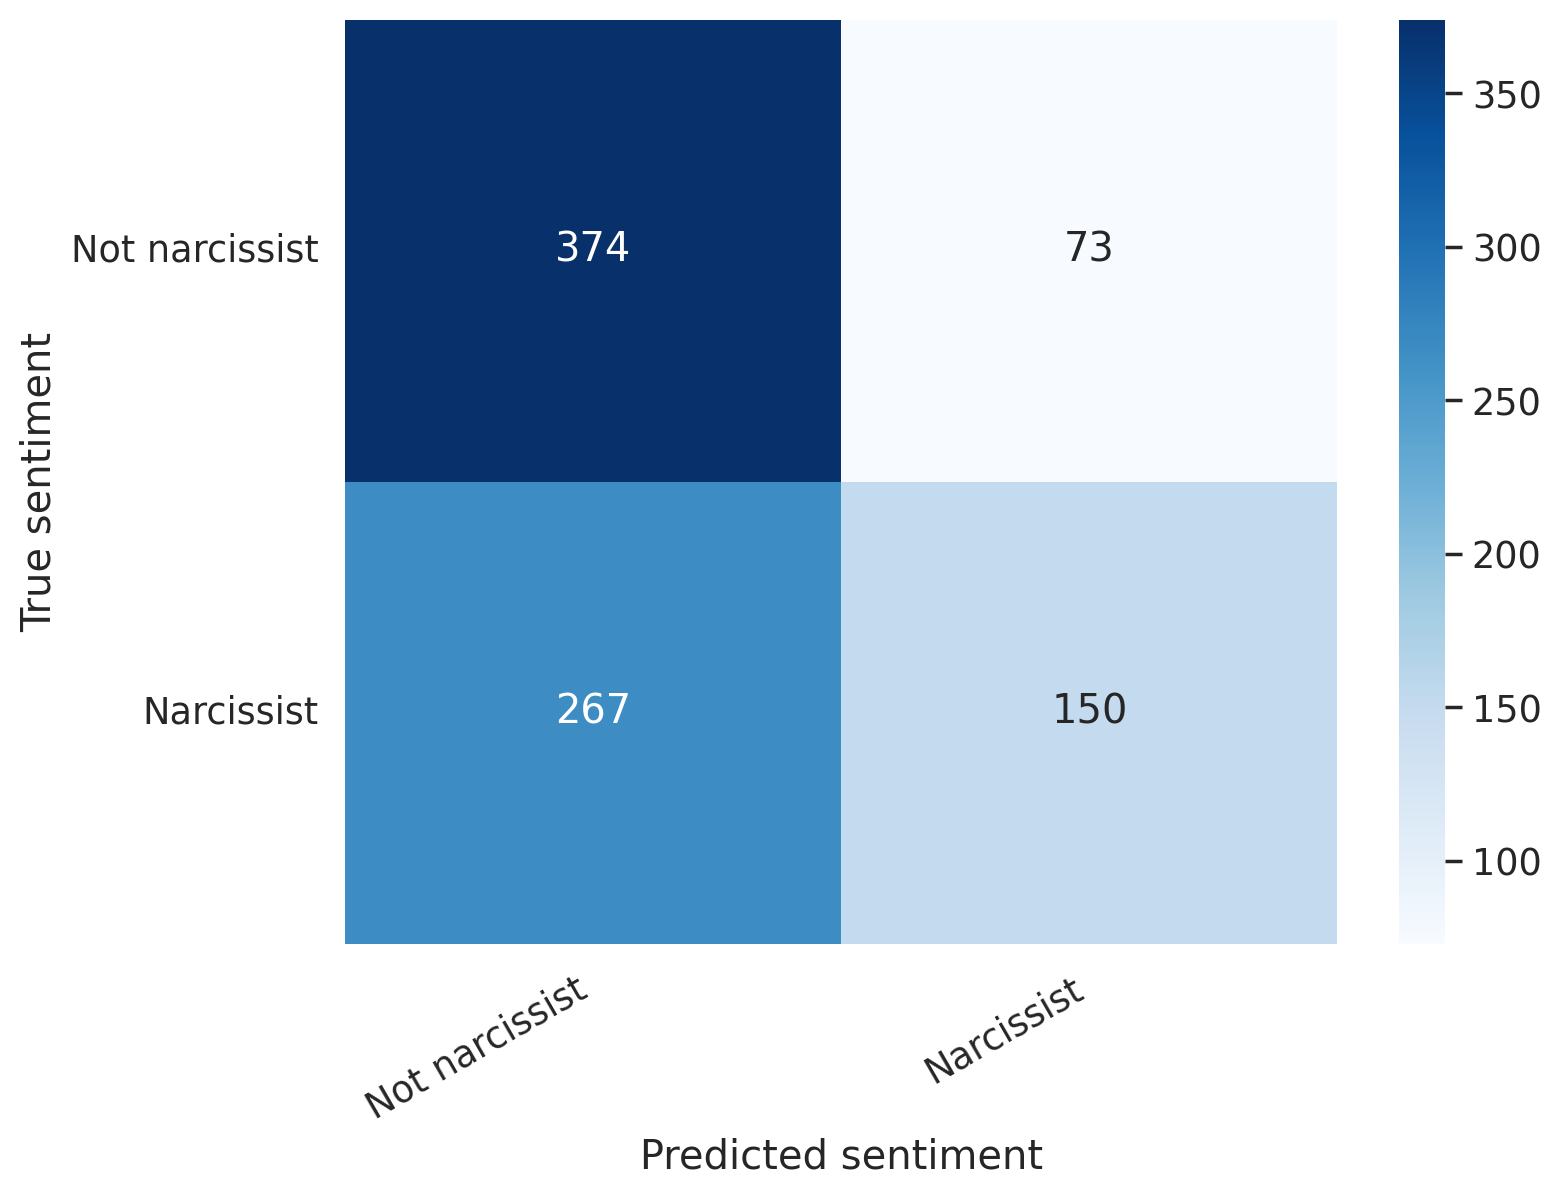

In [ ]:
# confusion matrix

def show_confusion_matrix(confusion_matrix):
    hmap = sns.heatmap(confusion_matrix, annot=True, fmt="d", cmap="Blues")
    hmap.yaxis.set_ticklabels(hmap.yaxis.get_ticklabels(), rotation=0, ha='right')
    hmap.xaxis.set_ticklabels(hmap.xaxis.get_ticklabels(), rotation=30, ha='right')
    plt.ylabel('True sentiment')
    plt.xlabel('Predicted sentiment');

cm = confusion_matrix(y_test, y_predictions)
df_cm = pd.DataFrame(cm, index=class_names, columns=class_names)
show_confusion_matrix(df_cm)